# Analyzing Motorcycle Power Trends

- Data Set Selection
- Executive Summary
- Loading and File IO
- Preparation and Feature Engineering
- Analysis and Visualization
- Supplementary Analysis for Extended Evaluation
- Conclusions
- Appendix and References

## Data set selection

Source: This project uses the “Motorcycle Specifications Dataset” dataset from Kaggle
 > (https://www.kaggle.com/datasets/emmanuelfwerr/motorcycle-technical-specifications-19702022)


Fields: This dataset includes detailed motorcycle specifications.
 - Rating
 - Displacement (cc)
 - Power (hp)
 - Torque (Nm)
 - Engine cylinder
 - Engine stroke
 - Gearbox
 - Bore (mm)
 - Stroke (mm)
 - Fuel capacity (lts)
 - Fuel system
 - Fuel control
 - Cooling system
 - Transmission type
 - Dry weight (kg)
 - Wheelbase (mm)
 - Seat height (mm)
 - Front brakes
 - Rear brakes
 - Front tire
 - Rear tire
 - Front suspension
 - Rear suspension
 - Color options


License: This dataset has a CC0: Public Domain license.
> "The person who associated a work with this deed has dedicated the work to the public domain by waiving all of his or her rights to the work worldwide under copyright law, including all related and neighboring rights, to the extent allowed by law. You can copy, modify, distribute and perform the work, even for commercial purposes, all without asking permission."

### Data set selection rationale

- I selected this dataset because it contains a large and diverse set of motorcycle specifications, which allows for valuable statistical analysis and visualization.
- The wide range of production years, engine sizes, and configurations makes it well suited for identifying trends rather than relying on isolated examples or reviews.
- Beyond the technical usefulness, this topic matters because motorcycle performance directly reflects engineering tradeoffs of power, weight, efficiency, and demand.
- These decisions influence how motorcycles are built and marketed across varying riding styles, such as commuting, racing, touring, and adventure.
- I am personally interested in this dataset because motorcycles are a major hobby of mine.
- This project allows me to apply domain knowledge to real-world data analysis to make the analytical process more engaging and meaningful.


### Questions to be answered

Using statistical analysis and visualization, we can answer the following:

- Is engine torque a direct result of the engine displacement?
   - Value: Helps understand how these two major engine specs are connected.

- Do motorcycles with more cylinders produce more horsepower on average?
   - Value: Shows whether engine configuration impacts power delivery.

- Do motorcycles with higher power output tend to have wider rear tires?
   - Value: Useful for identifying how manufacturers match tire size to performance needs.

- Which engine configurations are the most common in the dataset?
   - Value: Shows which engine types trend the best.

- Is there a correlation between motorcycle weight and engine size?
   - Value: Reveals whether heavier motorcycles typically have larger engines.


### Visualization ideas
To answer the questions above, I wil use the following visualizations:

- Scatterplot: Displacement (cc) vs Torque (Nm)
   - Insight: Shows whether engine displacement influences torque and how strong that relationship is.

- Bar Chart: Average Power (hp) by Engine Cylinder count
   - Insight: Reveals how different cylinder configurations (1-cylinder, 2-cylinder, 4-cylinder, etc.) impact horsepower.

- Scatterplot: Power (hp) vs Rear Tire Width
   - Insight: Shows whether motorcycles with higher power output tend to use wider rear tires, which relates to traction and performance.

- Histogram: Distribution of Power (hp)
   - Insight: Helps identify how horsepower is spread across the dataset and where most models fall.

- Scatterplot: Weight (kg) vs Displacement (cc)
   - Insight: Shows whether heavier motorcycles tend to have larger engines.

- Boxplot: Power-to-Weight Ratio (hp per kg) grouped by Cylinder Count
   - Insight: Highlights differences in performance efficiency across engine types.

## Executive Summary

This project analyzes motorcycle performance patterns using a comprehensive dataset of technical specifications spanning many manufacturers, models, and years. The goal was to examine how engine design, such as displacement and cylinder count, relate to power, torque, tire size, and weight. These insights help explain how motorcycles are engineered to balance performance, stability, and usability. These are all key characteristics of how manufacturers build products for the consumer mindset.

The analysis found direct correlation relationships between engine displacement and torque, as well as the relationship of displacement to weight. The analysis also found that higher horsepower models follow the trend for use of wider rear tires. This reflects the traction and stability requirements for the higher performance capacity of motorcycles with high horsepower. Overall, the results show very consistent and explainable patterns that align with real-world motorcycle engineering and design, which makes the findings relevant to both technical and non-technical stakeholders interested in the performance trends.

## Loading and File IO

In [213]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [214]:
# Import dataset
df = pd.read_csv('data/motorcycledata.csv')
df.head()
df.shape
df.info()

pd.set_option("display.max_columns", None)
plt.rcParams["figure.figsize"] = (8, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38472 entries, 0 to 38471
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                38472 non-null  object 
 1   Model                38444 non-null  object 
 2   Year                 38472 non-null  int64  
 3   Category             38472 non-null  object 
 4   Rating               21788 non-null  float64
 5   Displacement (ccm)   37461 non-null  float64
 6   Power (hp)           26110 non-null  float64
 7   Torque (Nm)          16634 non-null  float64
 8   Engine cylinder      38461 non-null  object 
 9   Engine stroke        38461 non-null  object 
 10  Gearbox              32675 non-null  object 
 11  Bore (mm)            28689 non-null  float64
 12  Stroke (mm)          28689 non-null  object 
 13  Fuel capacity (lts)  31704 non-null  float64
 14  Fuel system          27844 non-null  object 
 15  Fuel control         22008 non-null 

C:\Users\BJaco\AppData\Local\Temp\ipykernel_12580\2615236290.py:2: DtypeWarning:

Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.



## Preparation and Feature Engineering

Before analysis, the dataset needs cleaned and prepared to ensure that statistical results are valid and reliable. This will prevent outliers and missing data from disrupting the final results and any outcomes. This section handles this through data type corrections, missing values, and using calculations of existing to data to create new data that will be used for visualizations to help make analysis more informative.


### Data Type Conversion
Some columns in the dataset contain mixed or inconsistent data types, as well as missing or null values. Columns that represent numeric performance metrics are converted to numeric values to allow for statistical analysis. Values that cannot be converted are handled as missing data. Because this dataset aggregates information from many manufacturers and model years, some specifications are read and recorded differently. Missing values are addressed specifically depending on the analysis being performed rather than dropping data permanently.

### Additional Performance Metrics
To improve motorcycle performance evaluation, additional data metrics are created from existing variables. These metrics help standardize comparisons across motorcycles with different size engines, varying weights, and different engine configurations. Power-to-weight ratio is a common performance metric that accounts for engine output and vehicle weight. This metric will be used for more deeper performance comparisons of motorcycles with different specifications, rather than relying on their horsepower output.

### Engine Cylinder Normalization
The engine cylinder column contains string texts, such as “V-twin” or “Inline four,” which is not good for grouping and analysis because they are different data types. For analytical purposes, these descriptions are standardized by put them in simplified cylinder counts. This allows for clearer comparisons and reduction of missing data for performance characteristics across the many different engine configurations.

In [215]:
# Data Preparation and Feature Engineering
numeric_columns = [
    "Displacement (ccm)",
    "Power (hp)",
    "Torque (Nm)",
    "Bore (mm)",
    "Stroke (mm)",
    "Fuel capacity (lts)",
    "Dry weight (kg)",
    "Wheelbase (mm)",
]

for col in numeric_columns:
  df[col] = pd.to_numeric(df[col], errors="coerce")

df[numeric_columns].info()

df["Power_to_Weight"] = df["Power (hp)"] / df["Dry weight (kg)"]


def normalize_cylinders(value):
  if pd.isna(value):
    return np.nan
  value = value.lower()

  if "single" in value or "one" in value or "1" in value:
    return "1-cylinder"
  elif any(x in value for x in ["twin", "dual", "two", "2"]):
    return "2-cylinder"
  elif any(x in value for x in ["triple", "three", "3"]):
    return "3-cylinder"
  elif any(x in value for x in ["quad", "four", "4"]):
    return "4-cylinder"
  else:
    return "Other"


df["Cylinder_Group"] = df["Engine cylinder"].apply(normalize_cylinders)

df["Cylinder_Group"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38472 entries, 0 to 38471
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Displacement (ccm)   37461 non-null  float64
 1   Power (hp)           26110 non-null  float64
 2   Torque (Nm)          16634 non-null  float64
 3   Bore (mm)            28689 non-null  float64
 4   Stroke (mm)          28688 non-null  float64
 5   Fuel capacity (lts)  31704 non-null  float64
 6   Dry weight (kg)      22483 non-null  float64
 7   Wheelbase (mm)       25493 non-null  float64
dtypes: float64(8)
memory usage: 2.3 MB


Cylinder_Group
1-cylinder    20694
2-cylinder    11781
4-cylinder     3714
Other          1417
3-cylinder      855
Name: count, dtype: int64

### Preparation Summary
The dataset has now been fully cleaned, standardized, simplified, and improved with additional performance metrics that will be used for visualizations and data analysis. The analysis will be based on consistent and correct data interpretations to provide the best outputs possible.

## Analysis and Visualization
This section provides answers and data visualization for the research questions to get proper statistical analysis. Each subsection restates the question, presents a data visualization, and interprets the results in plain language.

### Relationship Between Engine Displacement and Torque
This analysis examines whether motorcycles with larger engine displacement tend to produce more torque.  From an engineering perspective, larger engines generally allow for higher torque because they can intake more air and provide higher leverage forces. Real-world data may show variation across models and designs, which will assist in our analysis. Data, int his car displacement and toruqe, is filtered to prevent outliers from creating a subpar visualization or skewing the data results.

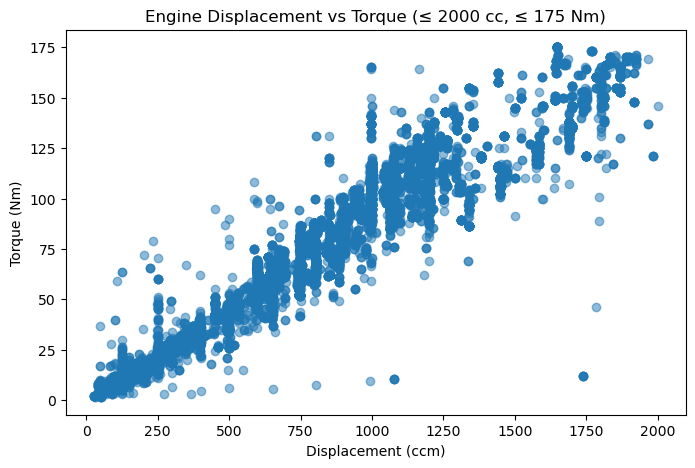

np.float64(0.9712975284772093)

In [216]:
# Prepare data
disp_torque_df = df[["Displacement (ccm)", "Torque (Nm)"]].dropna()
disp_torque_df = disp_torque_df[
    (disp_torque_df["Displacement (ccm)"] <= 2000) &
    (disp_torque_df["Torque (Nm)"] <= 175)
]

# Scatterplot
plt.scatter(
    disp_torque_df["Displacement (ccm)"],
    disp_torque_df["Torque (Nm)"],
    alpha=0.5
)
plt.xlabel("Displacement (ccm)")
plt.ylabel("Torque (Nm)")
plt.title("Engine Displacement vs Torque (≤ 2000 cc, ≤ 175 Nm)")
plt.show()

# Correlation
disp_torque_df["Displacement (ccm)"].corr(disp_torque_df["Torque (Nm)"])

**Figure Alt Text:** Scatterplot showing engine displacement on the x-axis and torque on the y-axis, with a clear upward trend .

The analysis shows a strong positive relationship between engine displacement and torque. The correlation statistic supports this trend, indicating that larger engines generally produce greater torque, although variability suggests other design factors also influence output.

### Average Horsepower by Engine Cylinder Configuration

This analysis explores whether motorcycles with higher cylinder counts tend to produce more horsepower on average.

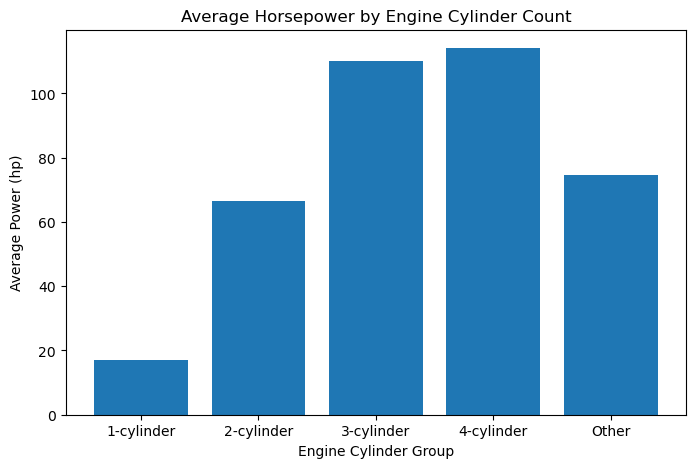

In [217]:
# Prepare data
cyl_power_df = (
    df[["Cylinder_Group", "Power (hp)"]]
    .dropna()
    .groupby("Cylinder_Group")
    .mean()
    .reset_index()
)

# Bar chart
plt.bar(cyl_power_df["Cylinder_Group"], cyl_power_df["Power (hp)"])
plt.xlabel("Engine Cylinder Group")
plt.ylabel("Average Power (hp)")
plt.title("Average Horsepower by Engine Cylinder Count")
plt.show()

**Figure Alt Text:** 
Bar chart showing average horsepower grouped by engine cylinder configuration.

Motorcycles with higher cylinder counts generally show higher average horsepower. This suggests that engine configuration plays a meaningful role in overall power output.

### Power Output and Rear Tire Width

This analysis examines whether motorcycles with higher power outputs trend towards using wider rear tires. This reflects how manufacturers match tire size to performance and traction needs.

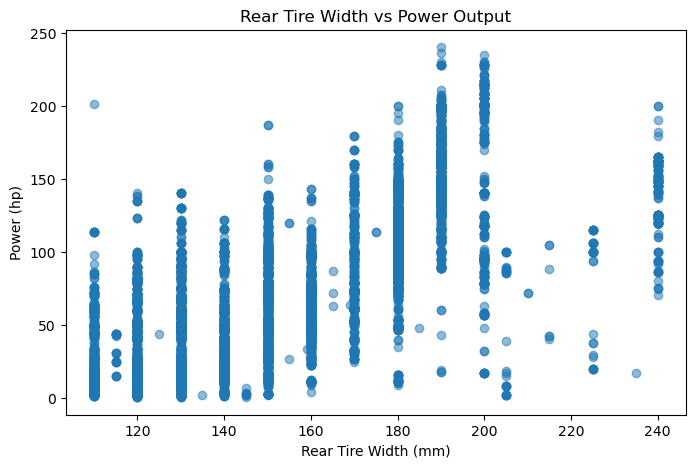

In [218]:
# Prepare data
df["Rear_Tire_Width"] = (
    df["Rear tire"]
    .astype(str)
    .str.extract(r"(\d+)", expand=False)
    .astype(float)
)
power_tire_df = df[["Power (hp)", "Rear_Tire_Width"]].dropna()
power_tire_df = power_tire_df[
    (power_tire_df["Rear_Tire_Width"] > 100) &
    (power_tire_df["Rear_Tire_Width"] <= 240)
]
power_tire_df = power_tire_df[power_tire_df["Power (hp)"] <= 240]

# Scatterplot
plt.scatter(
    power_tire_df["Rear_Tire_Width"],
    power_tire_df["Power (hp)"],
    alpha=0.5
)
plt.xlabel("Rear Tire Width (mm)")
plt.ylabel("Power (hp)")
plt.title("Rear Tire Width vs Power Output")
plt.show()

**Figure Alt Text:** Scatterplot showing rear tire width on the x-axis and horsepower on the y-axis.

The visualization suggest that motorcycles with higher power outputs often use wider rear tires. While the relationship is not perfectly linear, the overall pattern mostly aligns with performance based specification choices. A small number of extreme outliers were excluded due to unrealistic tire width values caused by manufacter reporting inconsistencies in the original dataset.

### Distribution of Motorcycle Horsepower
This visualization examines how horsepower values are distributed across motorcycles in the dataset. Understanding this distribution helps distinguish common production motorcycles from high-performance outliers.

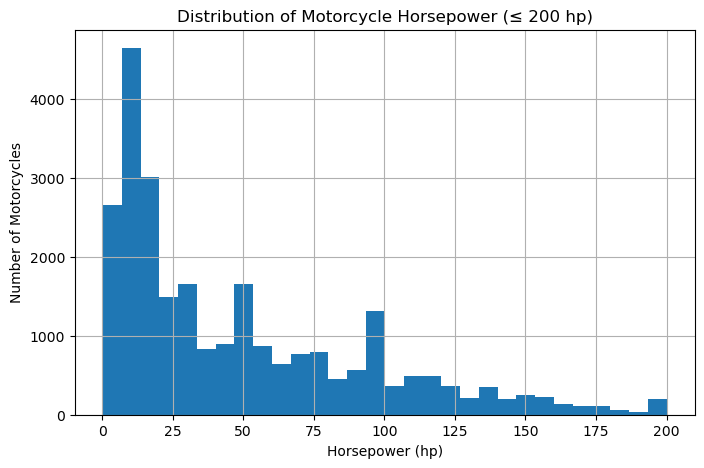

In [219]:
# Prepare data
power_clean = df["Power (hp)"].dropna()
power_clean = power_clean[
    (power_clean <= 200)
]

# Histogram
power_clean.hist(bins=30)
plt.xlabel("Horsepower (hp)")
plt.ylabel("Number of Motorcycles")
plt.title("Distribution of Motorcycle Horsepower (≤ 200 hp)")
plt.show()

**Figure Alt Text:** Histogram showing the distribution of motorcycle horsepower values.

Most motorcycles in the dataset fall within a casual horsepower range, with a long tail trending toward higher horsepower motorcycles. This indicates that while extremely powerful motorcycles exist, they atually represent a very small portion of the overall market and aren't typical for most production motorcycles. Motorcycles above 200 horsepower were excluded to focus the distribution on realistic, street-legal production motorcycles in the U.S. domestic market. This also makes the tail easier to analyze.

### Relationship Between Engine Displacement and Motorcycle Weight
This analysis examines whether motorcycles with larger engine displacement also tend to have greater weight. From an egineering standpoint, larger engines and stronger frames often increase overall motorcycle weight.

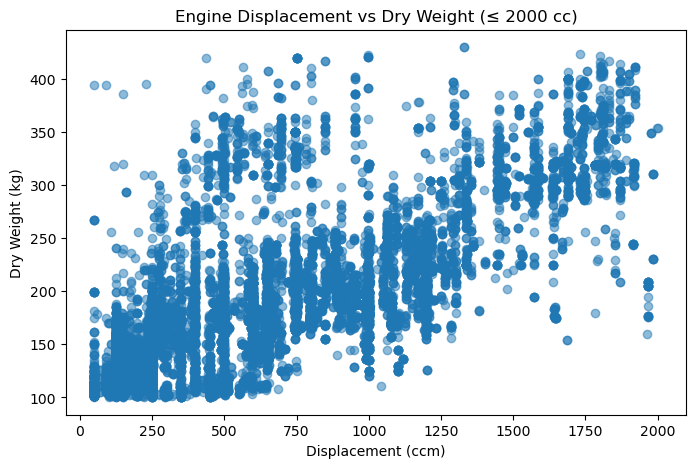

np.float64(0.7649353222707835)

In [220]:
# Prepare data
weight_disp_df = df[["Displacement (ccm)", "Dry weight (kg)"]].dropna()

weight_disp_df = weight_disp_df[
    (weight_disp_df["Displacement (ccm)"] <= 2000) &
    (weight_disp_df["Dry weight (kg)"] <= 430) &
    (weight_disp_df["Dry weight (kg)"] > 100)
]

# Scatterplot
plt.scatter(
    weight_disp_df["Displacement (ccm)"],
    weight_disp_df["Dry weight (kg)"],
    alpha=0.5
)
plt.xlabel("Displacement (ccm)")
plt.ylabel("Dry Weight (kg)")
plt.title("Engine Displacement vs Dry Weight (≤ 2000 cc)")
plt.show()

# Correlation statistic
weight_disp_df["Displacement (ccm)"].corr(weight_disp_df["Dry weight (kg)"])

**Figure Alt Text:** Scatterplot showing engine displacement on the x-axis and motorcycle dry weight on the y-axis.

The visualization shows a clear positive relationship between engine displacement and motorcycle weight. As engine size increases, motorcycles generally become heavier, reflecting the added mass of larger engines, more robust frames, and supporting components such as brakes and suspenion. While there is variation across categories, the overall trend aligns with real-world motorcycle design tradeoffs. A second relationship seems to be apparent, likely reflecting air cooled powered motorcycles, which tend to make less power than water cooled counter parts.


### Power-to-Weight Ratio by Engine Cylinder Configuration

This analysis compares the power-to-weight ratio of motorcycles across different engine cylinder configurations. Power-to-weight ratio is a useful performance metric because it accounts for both engine output and motorcycle mass, allowing for more meaningful performance comparisons.

<Figure size 800x500 with 0 Axes>

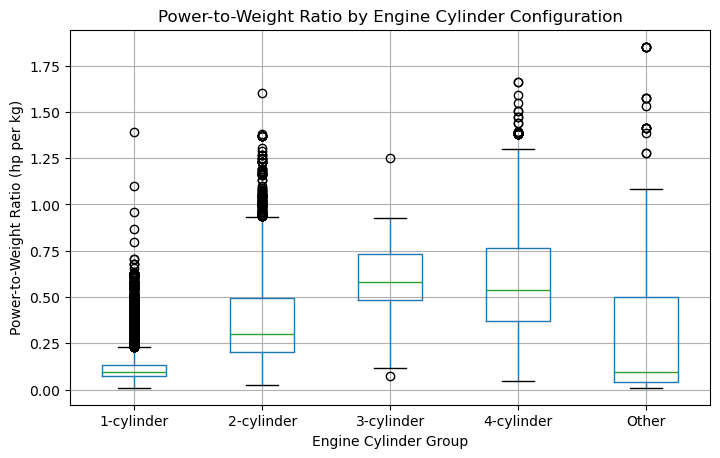

In [221]:
# Prepare data
ptw_df = df[["Cylinder_Group", "Power_to_Weight"]].dropna()

ptw_df = ptw_df[
    (ptw_df["Power_to_Weight"] > 0.01) &
    (ptw_df["Power_to_Weight"] <= 1.87)
]

# Boxplot
plt.figure()
ptw_df.boxplot(column="Power_to_Weight", by="Cylinder_Group")

plt.xlabel("Engine Cylinder Group")
plt.ylabel("Power-to-Weight Ratio (hp per kg)")
plt.title("Power-to-Weight Ratio by Engine Cylinder Configuration")
plt.suptitle("")
plt.show()

**Figure Alt Text:** Boxplot showing the distribution of power-to-weight ratios grouped by engine cylinder configuration.

The boxplot shows noticeable differences in performance efficiency across engine types. Motorcycles with higher cylinder counts generally have higher power-to-weight ratios, while lower-cylinder configurations tend to have lower and more tightly grouped values. This highlights how engine choice influence performance efficiency beyond just raw horsepower alone.


## Supplementary Analysis for Extended Evaluation

The following analyses provide additional depth to the statistical and visualization techniques aigned with this notebook. These analyses build on the core findings of the primary research questions or conclusions.


### Horsepower Distribution Summary and Time Trends

This supplementary analysis provides a summary for the distribution trends of motorcycle horsepower to provide a contextual foundation for evaluation. While individual motorcycle specifications offer yearly performance data, analyzing horsepower over time helps find more performance trends that could be influencing the  interpretation of the results.

By plotting average horsepower over time, this analysis will be able to determine whether differences between motorcycles reflect the engineering or are partially influence by increases in power over time. Establishing this context is necessary before introducing performance metrics that do not include technological advancements.

In [222]:
# Data summary
df["Power (hp)"].dropna().describe()

count    26110.000000
mean        50.776040
std         52.082094
min          0.300000
25%         12.000000
50%         30.000000
75%         77.000000
max        804.000000
Name: Power (hp), dtype: float64

<Axes: title={'center': 'Average Motorcycle Horsepower Over Time'}, xlabel='Year'>

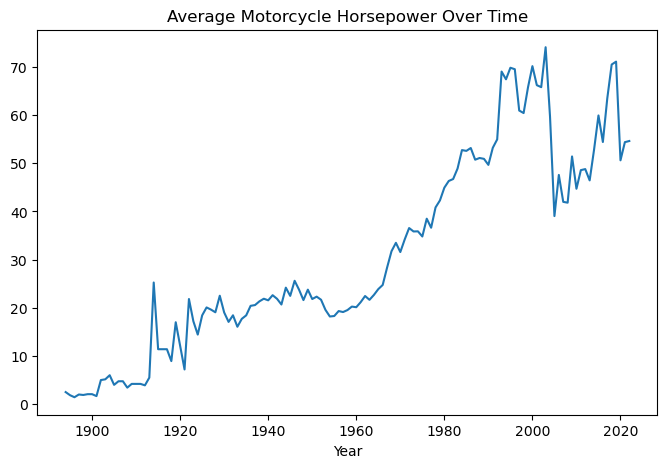

In [223]:
# Prepare data
hp_by_year = (
    df[["Year", "Power (hp)"]]
    .dropna()
    .groupby("Year")
    .mean()
    .reset_index()
)

# Plot
hp_by_year.plot(
    x="Year",
    y="Power (hp)",
    title="Average Motorcycle Horsepower Over Time",
    legend=False
)

The summary statistics provide a general sense of how horsepower is distributed across the dataset, while the yearly averages show that motorcycle horsepower has tended to increase over time. This upward trend suggests that raw horsepower data on theits own can be misleading when comparing motorcycles from different years. Because of this, horsepower needs to be interpreted with time-based context. Establishing this baseline helps ensure that comparisons focus on relative differences rather than broad increases throughout engine history.

### Weight Distribution and Structural Context

Horsepower doesn't fully capture motorcycle performance. Motorcycle weight plays a critical role in acceleration, handling, and all riding dynamics. This supplementary analysis examines the distribution of motorcycle weights to understand differences across the whole dataset, preparing for derived metrics.Understanding weight variation provides context for whether performance differences are driven by engine output or by reductions in weight. Lighter motorcycles can achieve higher performance efficiency even with modest horsepower and heavier motorcycles may require more horsepower to get similar results.

In [224]:
# Weight summary (limited range)
df_weight = df["Dry weight (kg)"].dropna()
df_weight = df_weight[(df_weight >= 100) & (df_weight <= 430)]

df_weight.describe()

count    17665.000000
mean       182.498200
std         70.532006
min        100.000000
25%        125.000000
50%        168.000000
75%        215.000000
max        430.000000
Name: Dry weight (kg), dtype: float64

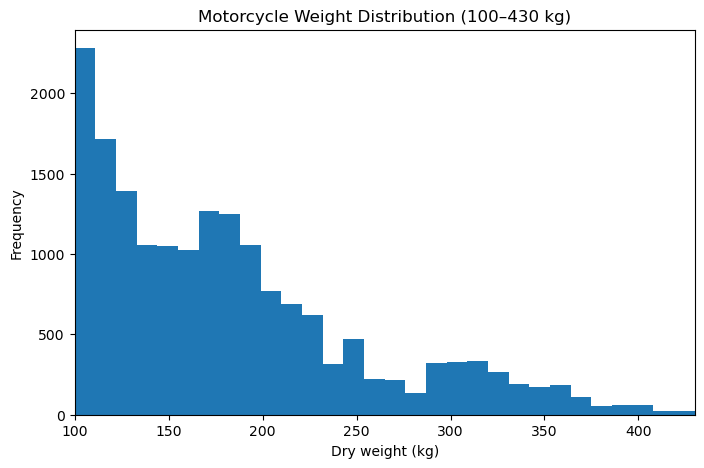

In [225]:
# Plot weight distribution (100–430 kg)
plt.figure()
df_weight.plot(kind="hist", bins=30)
plt.title("Motorcycle Weight Distribution (100–430 kg)")
plt.xlabel("Dry weight (kg)")
plt.ylabel("Frequency")
plt.xlim(100, 430)
plt.show()

The weight distribution shows wide variation across motorcycles, reflecting differences in their purpose such as racing, touring, and cruising. This spread confirms that weight is an important variable and should be considered when analyzing performance. Evaluating performance without accounting for weight would overstate the capability of heavier motorcycles and understate the efficiency of lighter ones.

### Power-to-Weight as a Standardized Performance Metric

While horsepower provides a general measure of engine output, it does not account for differences in the weight of the motorcycle. As a result, horsepower alone can exaggerate the expected performance of heavier motorcycles and underrepresenting lighter motorcycles with less horsepower.

To address this, a power-to-weight ratio is used as a standardized performance metric among many professionals. By establising a relationship of scaling horsepower to motorcycle weight, this metric allows for balanced comparisons across motorcycles with different specifications, classes, and configurations. This helps shift the evaluation from a single number to real world performance.

In [226]:
# Data summary
df_ptw = df[["Power (hp)", "Dry weight (kg)"]].dropna().copy()
df_ptw["Power_to_Weight"] = df_ptw["Power (hp)"] / df_ptw["Dry weight (kg)"]

df_ptw["Power_to_Weight"].describe()

count    15213.000000
mean         0.266520
std          0.252352
min          0.003333
25%          0.087736
50%          0.156863
75%          0.382648
max          2.296667
Name: Power_to_Weight, dtype: float64

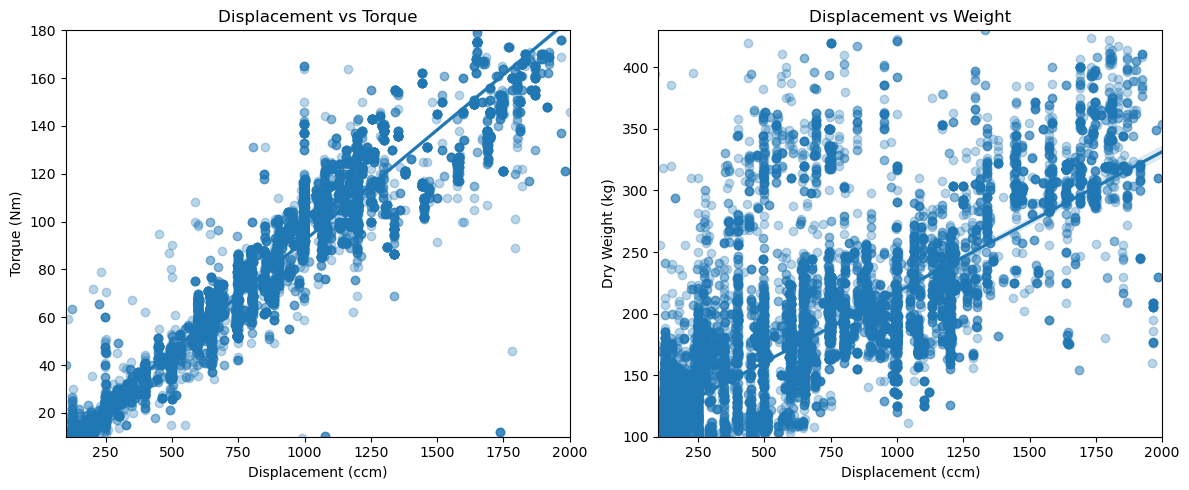

In [227]:
# Regression plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.regplot(
    data=df,
    x="Displacement (ccm)",
    y="Torque (Nm)",
    scatter_kws={"alpha": 0.3},
    ax=axes[0]
)
sns.regplot(
    data=df,
    x="Displacement (ccm)",
    y="Dry weight (kg)",
    scatter_kws={"alpha": 0.3},
    ax=axes[1]
)
axes[0].set_xlim(100, 2000)
axes[0].set_ylim(10, 180)
axes[1].set_xlim(100, 2000)
axes[1].set_ylim(100, 430)
axes[0].set_title("Displacement vs Torque")
axes[0].set_xlabel("Displacement (ccm)")
axes[0].set_ylabel("Torque (Nm)")

axes[1].set_title("Displacement vs Weight")
axes[1].set_xlabel("Displacement (ccm)")
axes[1].set_ylabel("Dry Weight (kg)")

plt.tight_layout()
plt.show()

The regression plots illustrate why horsepower alone is a performance metric that can not be used along. As engine displacement increases, torque relationally rises. However, displacement is also associated with motorcycle weight. Because higher horsepower often means more weight, horsepower doesn't directly translate to increased performance. This relationship reinforces the need for standardized metrics such as power-to-weight, which captures real-world performance.

### Categorical Association and Proportion of High-Performance Motorcycles

While numerical specfiications are good at describing performance, they don't show how performance is distributed across different categories. This supplementary analysis examines whether certain motorcycle categories contain a higher proportion of power-to-weight levels than others.

To do this, motorcycles'power-to-weight ratio is calcualted then a threshold is used to define “high-performance” for the top quartile of power-to-weight. The proportion of high-performance motorcycles is then calculated for each category and visualized as a bar chart. This proportion plot shows the categorical view of performance, showing which categories have higher power-to-weight ratios.

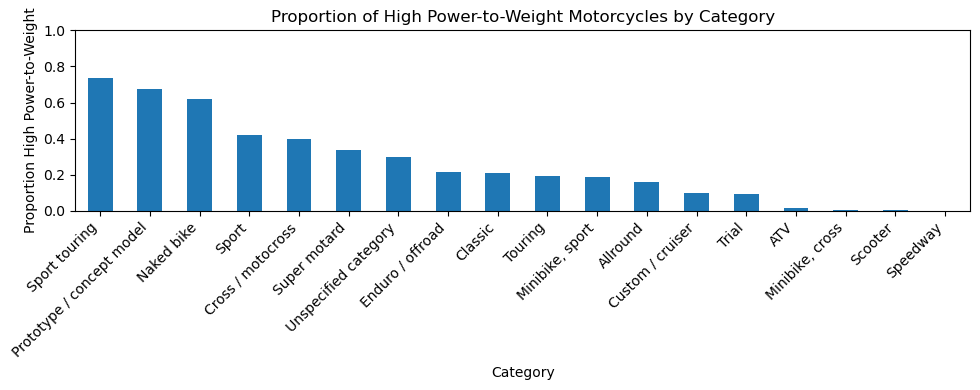

In [228]:
# Bar chart
df_cat = df[["Category", "Power (hp)", "Dry weight (kg)"]].dropna().copy()
df_cat["Power_to_Weight"] = df_cat["Power (hp)"] / df_cat["Dry weight (kg)"]

threshold = df_cat["Power_to_Weight"].quantile(0.75)
df_cat["High_PTW"] = df_cat["Power_to_Weight"] >= threshold

prop_by_category = (
    df_cat.groupby("Category")["High_PTW"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10, 4))
prop_by_category.plot(kind="bar")
plt.title("Proportion of High Power-to-Weight Motorcycles by Category")
plt.xlabel("Category")
plt.ylabel("Proportion High Power-to-Weight")
plt.ylim(0, 1)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

This categorical proportion plot shows that high power-to-weight motorcycles appear within each category. Categories with higher bars represent segments with more high-performance motorcycles while lower bars indicate categories with lower power-to-weight proportions. This association proves that performance is not evenly distributed across the dataset and that category of the motorcycles plays an important part in power-to-weight across all motorcycles.

### Performance Patterns by Engine Configuration

This supplementary analysis dives into how engine configuration relates to displacement and horsepower. By visualizing these variables at the same time, performance patterns that are harder to understand from a single motorcycle specifications are highlighted. Using an interactive scatter plot allows displacement and horsepower to be examined simluatenously while distinguishing the motorcycles by cylinder configuration. This provides additional depth of the data reading by revealing whether specific configurations tend to occupy distinct performance measures.

In [229]:
fig = px.scatter(
    df,
    x="Displacement (ccm)",
    y="Power (hp)",
    color="Cylinder_Group",
    title="Interactive Displacement vs Horsepower by Cylinder Configuration"
)
fig.update_xaxes(range=[100, 1500], title="Displacement (ccm)")
fig.update_yaxes(range=[0, 200], title="Horsepower (hp)")

fig

This visualization shows how horsepower doesn't increase perfectly with displacement across all cylinder configurations. Some engine groups cluster at higher horsepower levels despite similar displacement ranges, suggesting differences in engine configuations, tuning methods, and performance goals. By incorporating engine details into the analysis, this plot adds a multi-dimensional view that matches earlier power-to-weight and categorical findings.

## Conclusions
This analysis explored motorcycle performance and design trends using a large dataset of technical specifications for many years, makes, and models of motorcycles. The results show clear relationships between engine displacement, torque, horsepower, and motorcycle weight, reinforcing expected tradeoffs in motorcycle engineering. Larger engines tend to produce more torque but also add weight, while higher horsepower models often match their performance with wider rear tires for traction and stability.

While the dataset reveals strong overall patterns, there is some real variation across categories and overall designs. Differences in tuning, engine configuration, and intended use all influence performance beyond raw specifications. Future analysis could explore these differences in more detail by separating motorcycles by category or engine cooling type. Overall, I am pleased to report that the findings highlight that performance specifications, weight, and major engineering choices are closely interconnected in the modern motorcycle market.

Additionally, the supplementary analyses provide depth to the interpretation of the primary findings by placing performance metrics within categorical and multidimensional contexts. By examining other weight distributions, normalized measures, categorical associations, and interactive relationships among the major key variables, we find that motorcycle performance cannot be accurately displayed through single metrics. Instead, performace is derived from additional varibales, especially engine configuation and motoryccle category. This proves evaluation perspectives that motorcycle enginers would likely follow to support market trends and consumer preferences.

## Appendix and References

Motorcycle Technical Specifications Dataset (1970–2022): https://www.kaggle.com/datasets/emmanuelfwerr/motorcycle-technical-specifications-19702022

Additional analysis and calculations performed using Python, Pandas, NumPy, and Matplotlib.
